In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534291 entries, 0 to 1534290
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1534291 non-null  int64  
 1   kWh       1534291 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.4 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1534286    0.12
1534287    0.13
1534288    0.13
1534289    0.13
1534290    0.13
Name: kWh, Length: 1534291, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1534286    0.12
1534287    0.13
1534288    0.13
1534289    0.13
1534290    0.13
Name: kWh, Length: 1534291, dtype: float64

In [7]:
l=len(conso_data)-1
l

1534290

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534291 entries, 0 to 1534290
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1534291 non-null  int64  
 1   kWh        1534291 non-null  float64
 2   sec        1534291 non-null  float64
 3   Wh         1534291 non-null  float64
 4   cumul(ms)  1534291 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 58.5 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1534286,29148,0.12,29.148,123.507616,37995609188
1534287,28462,0.13,28.462,126.484435,37995637650
1534288,26823,0.13,26.823,134.213175,37995664473
1534289,27188,0.13,27.188,132.411358,37995691661
1534290,28001,0.13,28.001,128.566837,37995719662


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

37995719662000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 43, 9, 950357)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [18]:
conso_data['dates']

0         2023-08-21 18:43:31.884357
1         2023-08-21 18:43:53.742357
2         2023-08-21 18:44:15.743357
3         2023-08-21 18:44:37.671357
4         2023-08-21 18:44:59.562357
                     ...            
1534286   2024-11-03 13:03:19.138357
1534287   2024-11-03 13:03:47.600357
1534288   2024-11-03 13:04:14.423357
1534289   2024-11-03 13:04:41.611357
1534290   2024-11-03 13:05:09.612357
Name: dates, Length: 1534291, dtype: datetime64[ns]

## créer les dates

In [19]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:31.884357,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:43:53.742357,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:15.743357,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:37.671357,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:44:59.562357,21/08/23
...,...,...,...,...,...,...,...
1534286,29148,0.12,29.148,123.507616,37995609188,2024-11-03 13:03:19.138357,03/11/24
1534287,28462,0.13,28.462,126.484435,37995637650,2024-11-03 13:03:47.600357,03/11/24
1534288,26823,0.13,26.823,134.213175,37995664473,2024-11-03 13:04:14.423357,03/11/24
1534289,27188,0.13,27.188,132.411358,37995691661,2024-11-03 13:04:41.611357,03/11/24


### save conso_data with dates

In [20]:
to_csv('conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('03/11/24', 3, 11, 2024)

In [22]:
here = now.strftime('%H:%M:%S')
here

'13:06:16'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 1532677 to 1534290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1614 non-null   int64         
 1   kWh        1614 non-null   float64       
 2   sec        1614 non-null   float64       
 3   Wh         1614 non-null   float64       
 4   cumul(ms)  1614 non-null   int64         
 5   dates      1614 non-null   datetime64[ns]
 6   days       1614 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 100.9+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.883, 3.699, 4.225, 3.692, 4.206, 4.626, 3.49, 3.397, 3.531, 3.682, 3.831, 3.727, 4.257, 3.851, 3.428, 3.631, 3.325, 3.448, 4.24, 4.011, 4.062, 3.896, 3.433, 4.484, 3.703, 3.819, 4.406, 4.662, 3.736, 3.224, 3.171, 4.047, 3.633, 3.183, 3.792, 4.172, 3.743, 3.558, 4.813, 4.168, 4.539, 3.775, 3.383, 4.316, 3.881, 3.877, 3.432, 4.076, 3.651, 3.404, 4.112, 3.4, 3.888, 3.83, 3.649, 3.746, 4.244, 3.287, 3.88, 2.962, 2.055, 2.041, 2.478, 4.085, 3.738, 4.324, 3.637, 3.897, 3.746, 3.957, 3.94, 4.134, 3.672, 3.127, 3.797, 3.545, 3.594, 3.704, 3.685, 3.233, 3.908, 3.264, 3.749, 3.587, 4.099, 3.675, 3.264, 3.826, 4.065, 4.385, 4.085, 3.999, 4.221, 3.743, 3.931, 3.875, 3.91, 3.752, 4.035, 4.338, 3.882, 3.532, 3.66, 3.669, 3.339, 3.855, 3.986, 4.12, 3.464, 4.178, 3.606, 4.125, 4.496, 3.691, 3.412, 3.592, 4.189, 3.653, 4.079, 3.982, 3.755, 3.58, 5.144, 3.697, 3.762, 4.299, 4.085, 4.777, 4.395, 3.941, 3.806, 4.373, 4.633, 4.237, 4.777, 4.345, 3.667, 4.236, 3.684, 3.613, 3.528, 3.969, 3.638, 3.789, 3.

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1534291

In [30]:
period(p=2)

2023-08-22 00:49:45.687357	2023-08-22 07:54:01.307357	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291564
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.479118
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

1.614

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 1532677 to 1534290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1614 non-null   int64         
 1   kWh        1614 non-null   float64       
 2   sec        1614 non-null   float64       
 3   Wh         1614 non-null   float64       
 4   cumul(ms)  1614 non-null   int64         
 5   dates      1614 non-null   datetime64[ns]
 6   days       1614 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 100.9+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


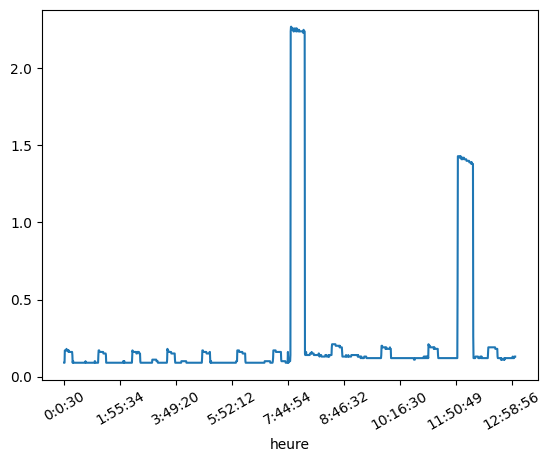

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:31.884357,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:43:53.742357,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:15.743357,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:37.671357,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:44:59.562357,21/08/23
...,...,...,...,...,...,...,...
1534286,29148,0.12,29.148,123.507616,37995609188,2024-11-03 13:03:19.138357,03/11/24
1534287,28462,0.13,28.462,126.484435,37995637650,2024-11-03 13:03:47.600357,03/11/24
1534288,26823,0.13,26.823,134.213175,37995664473,2024-11-03 13:04:14.423357,03/11/24
1534289,27188,0.13,27.188,132.411358,37995691661,2024-11-03 13:04:41.611357,03/11/24


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:30,39436,0.09,39.436,91.287149,37948640156,2024-11-03 00:00:30.106357,03/11/24
0:1:8,38819,0.09,38.819,92.738092,37948678975,2024-11-03 00:01:08.925357,03/11/24
0:1:30,21577,0.17,21.577,166.844325,37948700552,2024-11-03 00:01:30.502357,03/11/24
0:1:51,21242,0.17,21.242,169.475567,37948721794,2024-11-03 00:01:51.744357,03/11/24
0:2:13,21262,0.17,21.262,169.316151,37948743056,2024-11-03 00:02:13.006357,03/11/24
...,...,...,...,...,...,...,...
13:3:19,29148,0.12,29.148,123.507616,37995609188,2024-11-03 13:03:19.138357,03/11/24
13:3:47,28462,0.13,28.462,126.484435,37995637650,2024-11-03 13:03:47.600357,03/11/24
13:4:14,26823,0.13,26.823,134.213175,37995664473,2024-11-03 13:04:14.423357,03/11/24


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.084
Min : 11/10/24 1.785


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1532677,39436,0.09,39.436,91.287149,37948640156,2024-11-03 00:00:30.106357,03/11/24,0:0:30
1532678,38819,0.09,38.819,92.738092,37948678975,2024-11-03 00:01:08.925357,03/11/24,0:1:8
1532679,21577,0.17,21.577,166.844325,37948700552,2024-11-03 00:01:30.502357,03/11/24,0:1:30
1532680,21242,0.17,21.242,169.475567,37948721794,2024-11-03 00:01:51.744357,03/11/24,0:1:51
1532681,21262,0.17,21.262,169.316151,37948743056,2024-11-03 00:02:13.006357,03/11/24,0:2:13
...,...,...,...,...,...,...,...,...
1534286,29148,0.12,29.148,123.507616,37995609188,2024-11-03 13:03:19.138357,03/11/24,13:3:19
1534287,28462,0.13,28.462,126.484435,37995637650,2024-11-03 13:03:47.600357,03/11/24,13:3:47
1534288,26823,0.13,26.823,134.213175,37995664473,2024-11-03 13:04:14.423357,03/11/24,13:4:14
1534289,27188,0.13,27.188,132.411358,37995691661,2024-11-03 13:04:41.611357,03/11/24,13:4:41


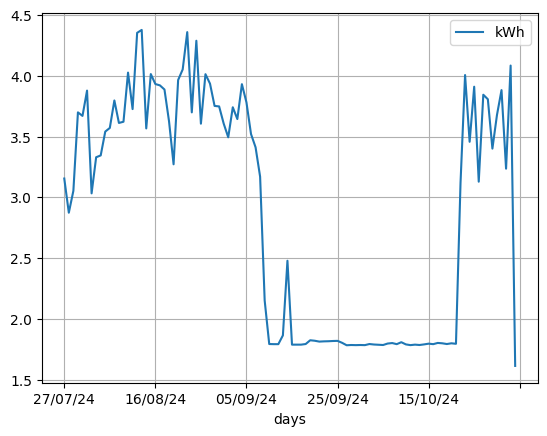

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-03 00:00:30.106357	2024-11-03 08:46:05.518357	8h 45m 35s 	1000
2024-11-03 08:46:05.518357	2024-11-03 13:05:09.612357	4h 19m 4s 	614
<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 1532677 to 1534290
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1614 non-null   int64         
 1   kWh        1614 non-null   float64       
 2   sec        1614 non-null   float64       
 3   Wh         1614 non-null   float64       
 4   cumul(ms)  1614 non-null   int64         
 5   dates      1614 non-null   datetime64[ns]
 6   days       1614 non-null   object        
 7   heure      1614 non-null   object        
 8   hours      1614 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 126.1+ KB


('03/11/24', <Axes: xlabel='hours'>)

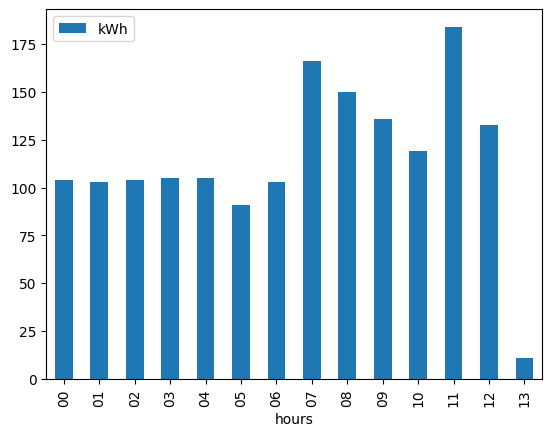

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.883
22/08/23,3.699
23/08/23,4.225
24/08/23,3.692
25/08/23,4.206
...,...
30/10/24,3.677
31/10/24,3.882
01/11/24,3.236


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


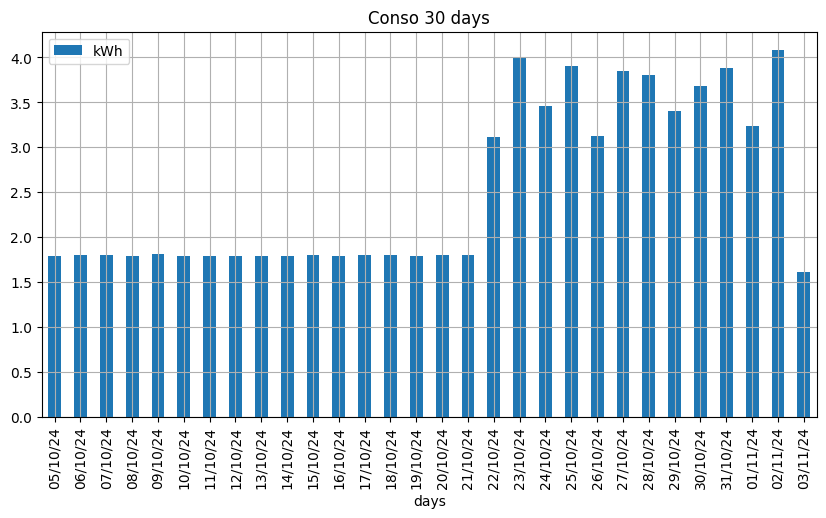

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


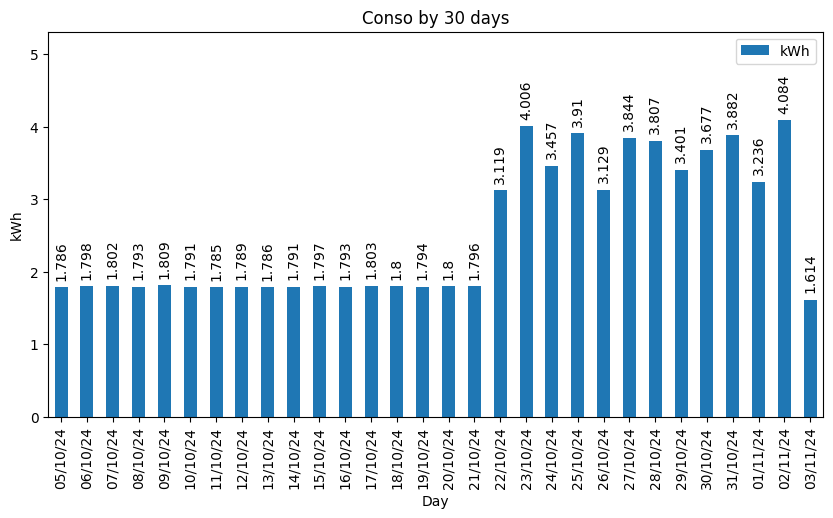

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
05/10/24    1.786
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.785
12/10/24    1.789
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.119
23/10/24    4.006
24/10/24    3.457
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
03/11/24    1.614
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['05/10/24', '06/10/24', '07/10/24', '08/10/24', '09/10/24', '10/10/24',
       '11/10/24', '12/10/24', '13/10/24', '14/10/24', '15/10/24', '16/10/24',
       '17/10/24', '18/10/24', '19/10/24', '20/10/24', '21/10/24', '22/10/24',
       '23/10/24', '24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24',
       '29/10/24', '30/10/24', '31/10/24', '01/11/24', '02/11/24', '03/11/24'],
      dtype='object', name='days')

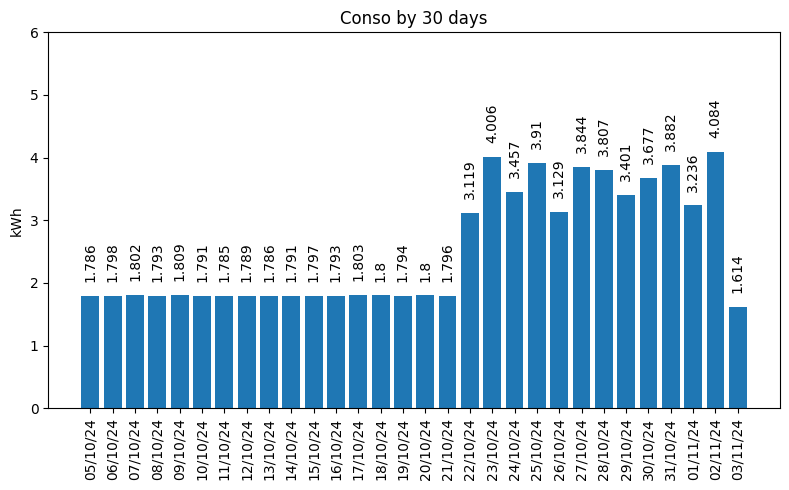

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

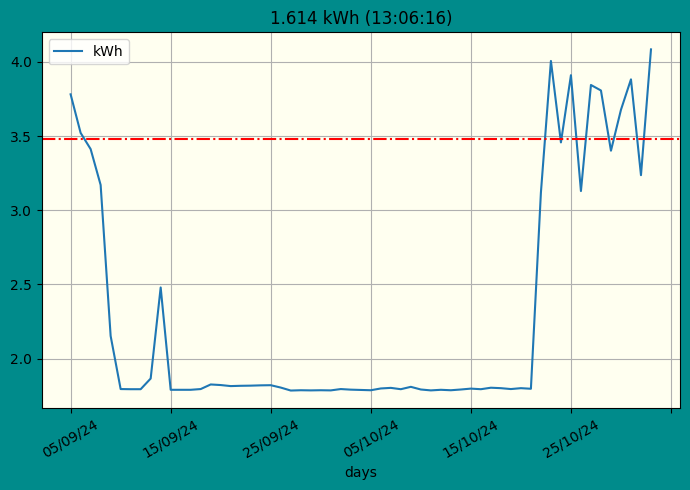

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

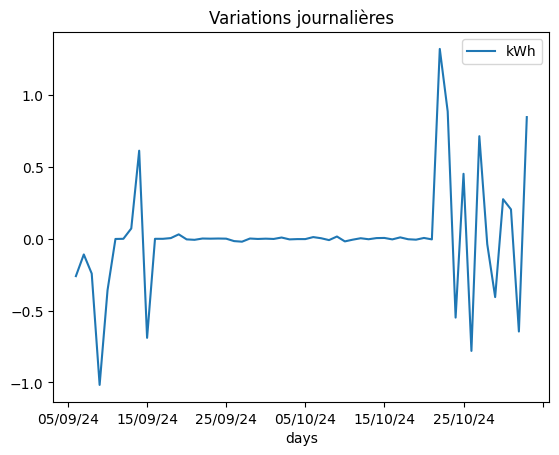

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:31.884357,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:43:53.742357,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:15.743357,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:37.671357,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:44:59.562357,21/08/23,18
...,...,...,...,...,...,...,...,...
1534286,29148,0.12,29.148,123.507616,37995609188,2024-11-03 13:03:19.138357,03/11/24,13
1534287,28462,0.13,28.462,126.484435,37995637650,2024-11-03 13:03:47.600357,03/11/24,13
1534288,26823,0.13,26.823,134.213175,37995664473,2024-11-03 13:04:14.423357,03/11/24,13
1534289,27188,0.13,27.188,132.411358,37995691661,2024-11-03 13:04:41.611357,03/11/24,13


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,883
22/08/23,3699
23/08/23,4225
24/08/23,3692
25/08/23,4206
...,...
30/10/24,3677
31/10/24,3882
01/11/24,3236


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:31.884357,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:43:53.742357,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:15.743357,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:37.671357,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:44:59.562357,21/08/23,18
...,...,...,...,...,...,...,...,...
1534286,29148,0.12,29.148,123.507616,37995609188,2024-11-03 13:03:19.138357,03/11/24,13
1534287,28462,0.13,28.462,126.484435,37995637650,2024-11-03 13:03:47.600357,03/11/24,13
1534288,26823,0.13,26.823,134.213175,37995664473,2024-11-03 13:04:14.423357,03/11/24,13
1534289,27188,0.13,27.188,132.411358,37995691661,2024-11-03 13:04:41.611357,03/11/24,13


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
03/11/24 13    1534286  03/11/24    13  0.12
               1534287  03/11/24    13  0.13
               1534288  03/11/24    13  0.13
               1534289  03/11/24    13  0.13
               1534290  03/11/24    13  0.13

[1534291 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,883,883
22/08/23,3699,3699
23/08/23,4225,4225
24/08/23,3692,3692
25/08/23,4206,4206
...,...,...
30/10/24,3677,3677
31/10/24,3882,3882
01/11/24,3236,3236


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        883
22/08/23       4582
23/08/23       8807
24/08/23      12499
25/08/23      16705
             ...   
30/10/24    1521475
31/10/24    1525357
01/11/24    1528593
02/11/24    1532677
03/11/24    1534291
Name: kWh, Length: 441, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      46
         19     275
         20     167
         21     129
         22     133
...             ...
03/11/24 09     136
         10     119
         11     184
         12     133
         13      11

[10556 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            46
          19           321
          20           488
          21           617
          22           750
                    ...   
03/11/24  09       1533844
          10       1533963
          11       1534147
          12       1534280
          13       1534291
Name: kWh, Length: 10556, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      46      46    NaN
         19     275     321  229.0
         20     167     488 -108.0
         21     129     617  -38.0
         22     133     750    4.0
...             ...     ...    ...
03/11/24 09     136    1167  -14.0
         10     119    1286  -17.0
         11     184    1470   65.0
         12     133    1603  -51.0
         13      11    1614 -122.0

[10556 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('03/11/24',
        kWh  cumsum   diff
 hours                    
 00     104     104    NaN
 01     103     207   -1.0
 02     104     311    1.0
 03     105     416    1.0
 04     105     521    0.0
 05      91     612  -14.0
 06     103     715   12.0
 07     166     881   63.0
 08     150    1031  -16.0
 09     136    1167  -14.0
 10     119    1286  -17.0
 11     184    1470   65.0
 12     133    1603  -51.0
 13      11    1614 -122.0)

Text(0.5, 1.0, 'Cumul journalier')

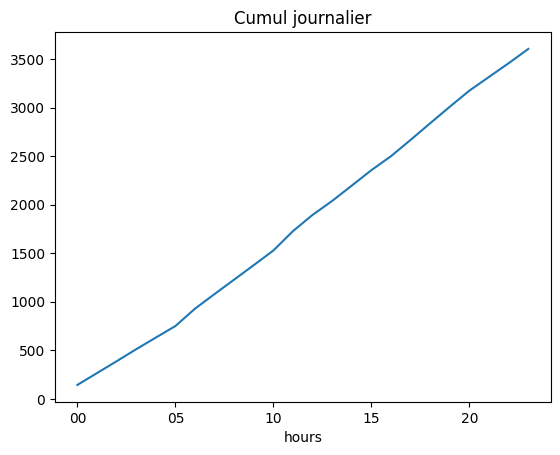

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

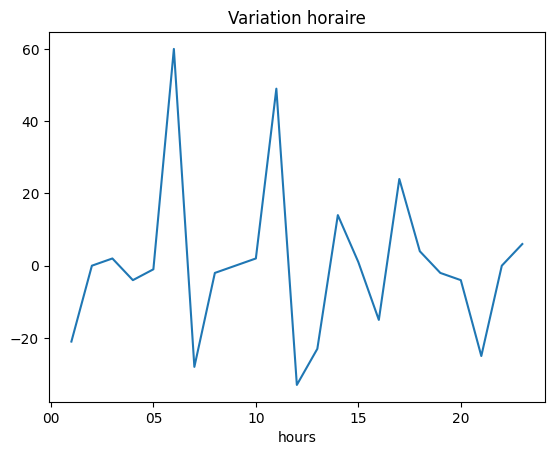

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

441

Text(0.5, 1.0, '441 days')

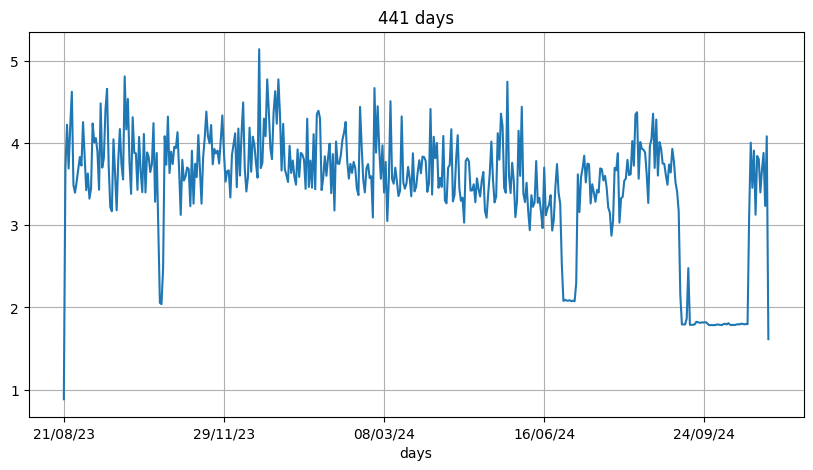

In [71]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

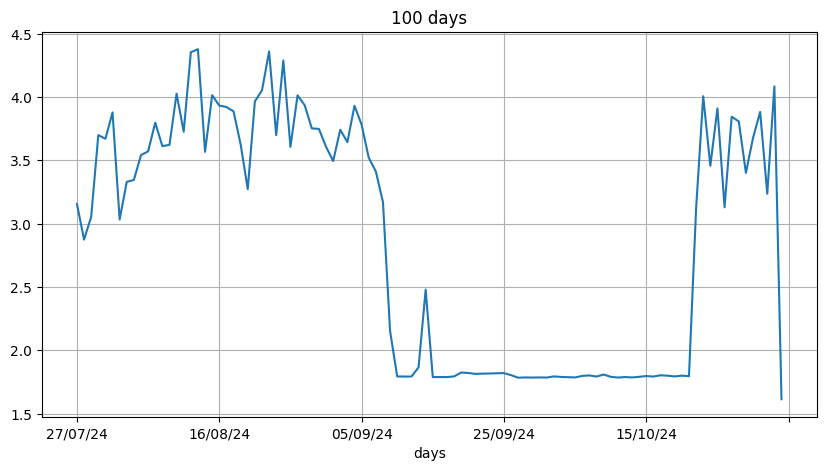

In [72]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [73]:
df_grp.tail(span)['kWh']

days
27/07/24    3.155
28/07/24    2.874
29/07/24    3.054
30/07/24    3.699
31/07/24    3.670
            ...  
30/10/24    3.677
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
03/11/24    1.614
Name: kWh, Length: 100, dtype: float64

In [74]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,104,104,NaN
01,103,207,-1.0
02,104,311,1.0
03,105,416,1.0
04,105,521,0.0
05,91,612,-14.0
06,103,715,12.0
07,166,881,63.0
08,150,1031,-16.0


In [75]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


14

In [76]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 15)

In [77]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [78]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [79]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: days, dtype: float64

In [80]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [81]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 00 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     14 non-null     int64  
 1   cumsum  14 non-null     int64  
 2   diff    13 non-null     float64
 3   days    14 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 560.0+ bytes


In [82]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: days, dtype: float64

In [83]:
day

'03/11/24'

In [84]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,104,104,NaN,1.0
01,103,207,-1.0,2.0
02,104,311,1.0,3.0
03,105,416,1.0,4.0
04,105,521,0.0,5.0
05,91,612,-14.0,6.0
06,103,715,12.0,7.0
07,166,881,63.0,8.0
08,150,1031,-16.0,9.0


Text(0.5, 1.0, '03/11/24')

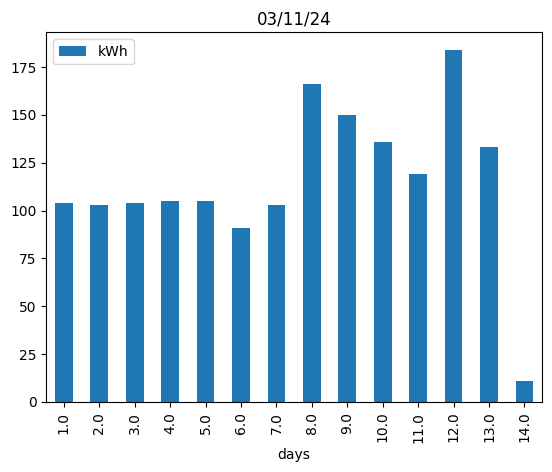

In [85]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [86]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13'],
      dtype='object', name='hours')

# Conso du jour


In [87]:
groupedbyhour.count()

,kWh
hours,
00,104
01,103
02,104
03,105
04,105
05,91
06,103
07,166
08,150


In [88]:
day = '13/09/24'
#day = today
grp_by_dayhours.loc[day].kWh

hours
00     77
01     77
02     77
03     78
04     75
05     76
06     76
07     75
08     72
09     73
10     73
11     73
12     73
13     73
14     73
15     74
16     73
17     73
18     73
19     77
20     75
21     86
22    105
23    108
Name: kWh, dtype: int64

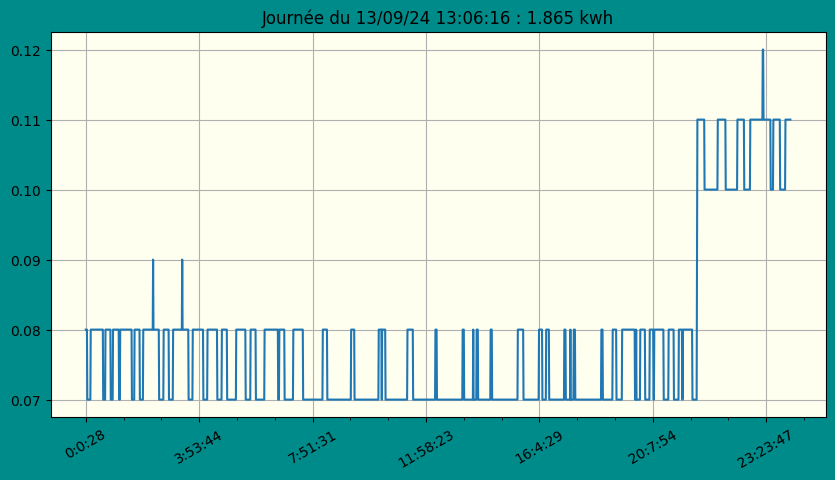

In [89]:
show('13/09/24',bgcolor='ivory')

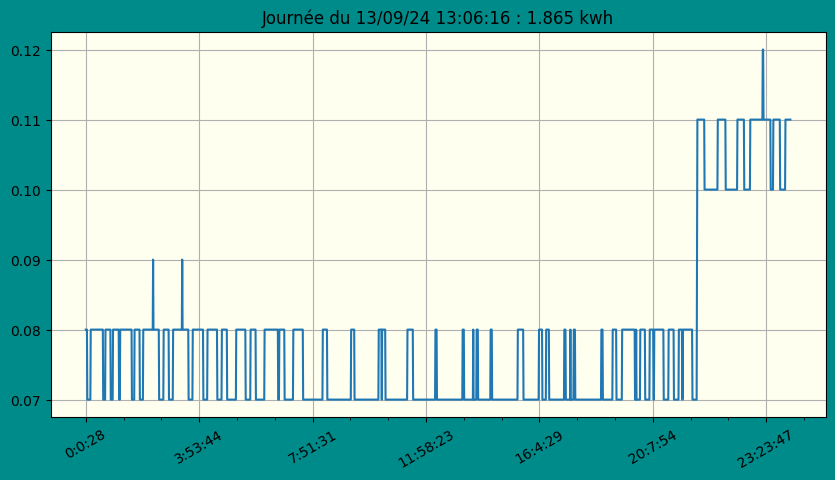

In [90]:
show(day,bgcolor='ivory')

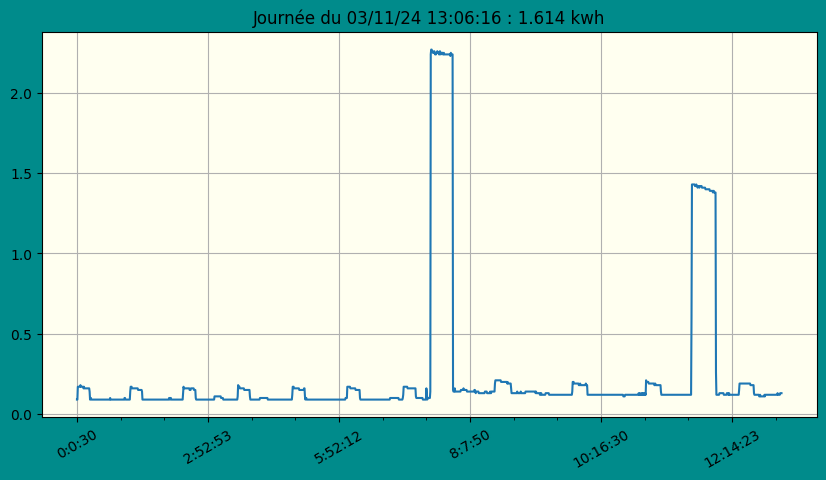

In [91]:
# retour vietnam 22/10/2024
show(today,bgcolor='ivory')

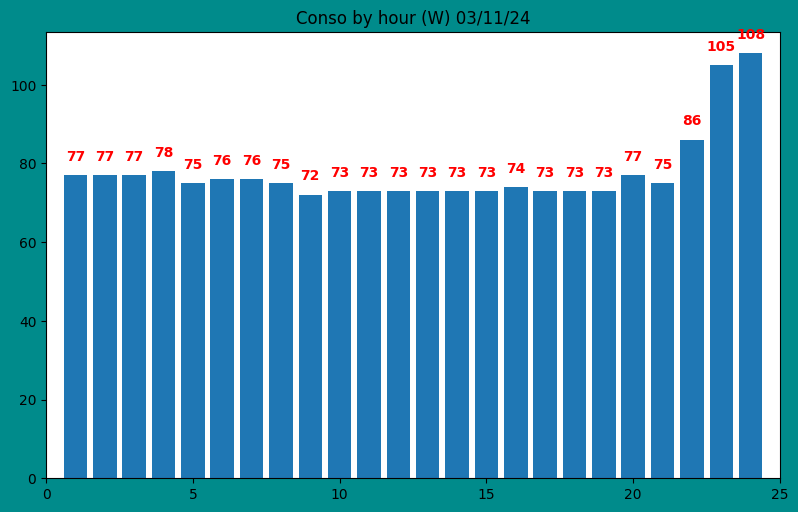

In [92]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [93]:
diff = grp_by_dayhours.loc[day]
diff


,kWh,cumsum,diff,days
hours,,,,
00,77,77,NaN,NaN
01,77,154,0.0,NaN
02,77,231,0.0,NaN
03,78,309,1.0,NaN
04,75,384,-3.0,NaN
05,76,460,1.0,NaN
06,76,536,0.0,NaN
07,75,611,-1.0,NaN
08,72,683,-3.0,NaN


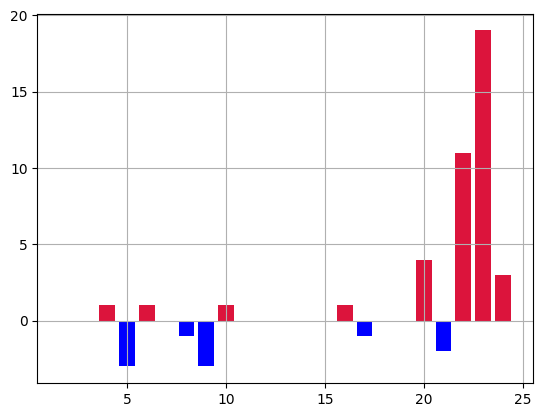

In [94]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

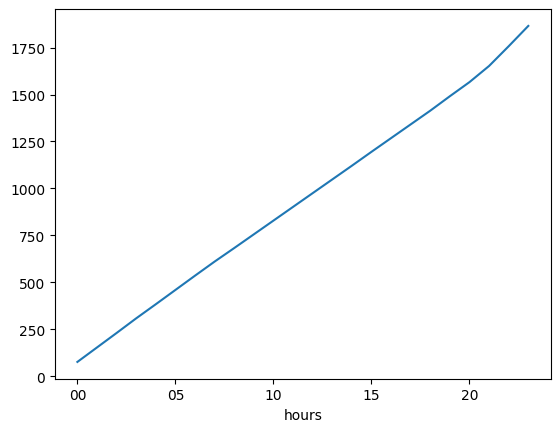

In [95]:
data.cumsum().plot()


<Axes: xlabel='hours'>

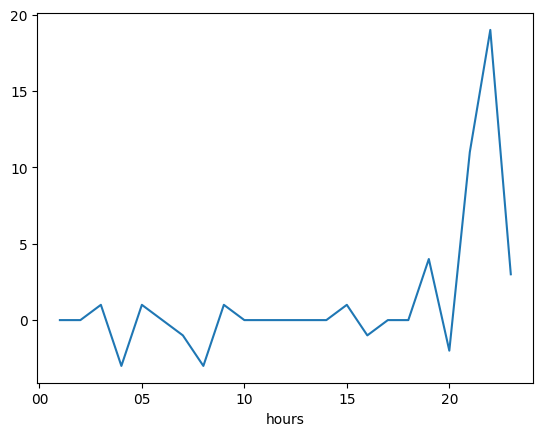

In [96]:
data.diff().plot()

# Test

In [97]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_data_with_dates.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp1612

In [98]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_data_with_dates.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [99]:
#conso_byhour(day)

In [100]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

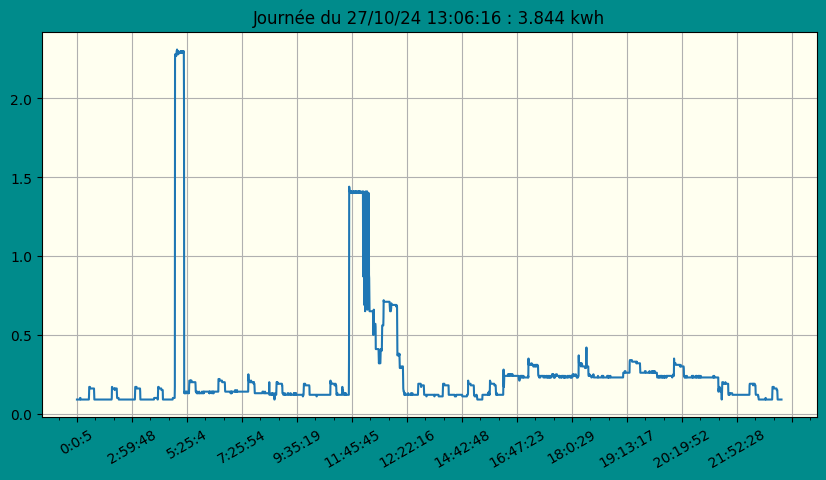

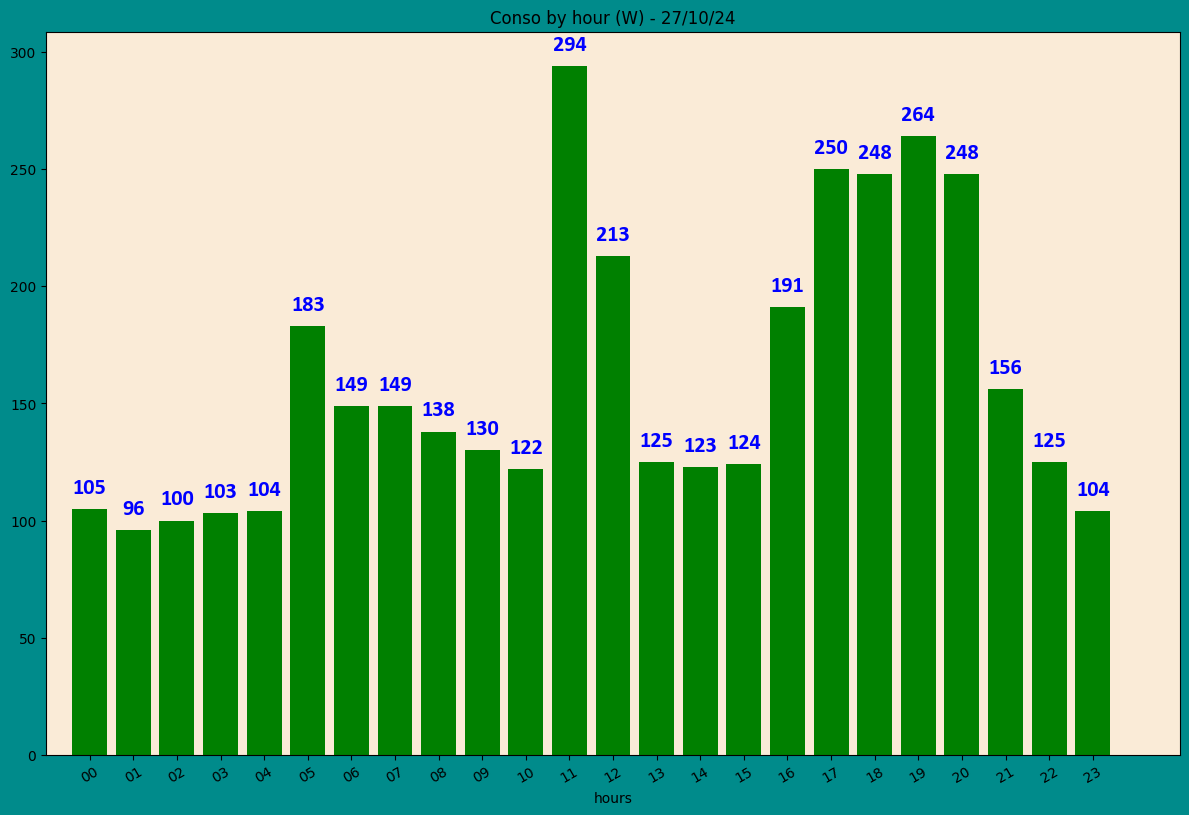

In [101]:
# plot any day
day = '27/10/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

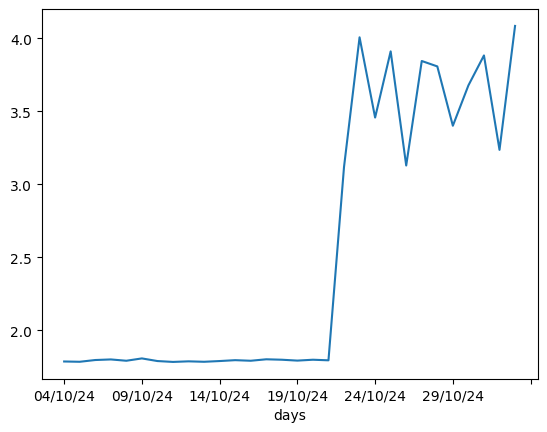

In [102]:
month.plot()


In [103]:
month

days
04/10/24    1.788
05/10/24    1.786
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.785
12/10/24    1.789
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.119
23/10/24    4.006
24/10/24    3.457
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
Name: kWh, dtype: float64

In [104]:
month

days
04/10/24    1.788
05/10/24    1.786
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.785
12/10/24    1.789
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.119
23/10/24    4.006
24/10/24    3.457
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
Name: kWh, dtype: float64

In [105]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [106]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

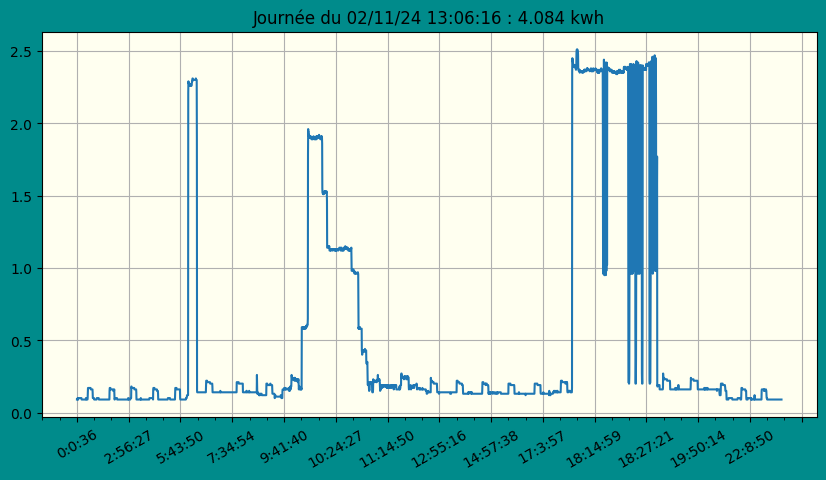

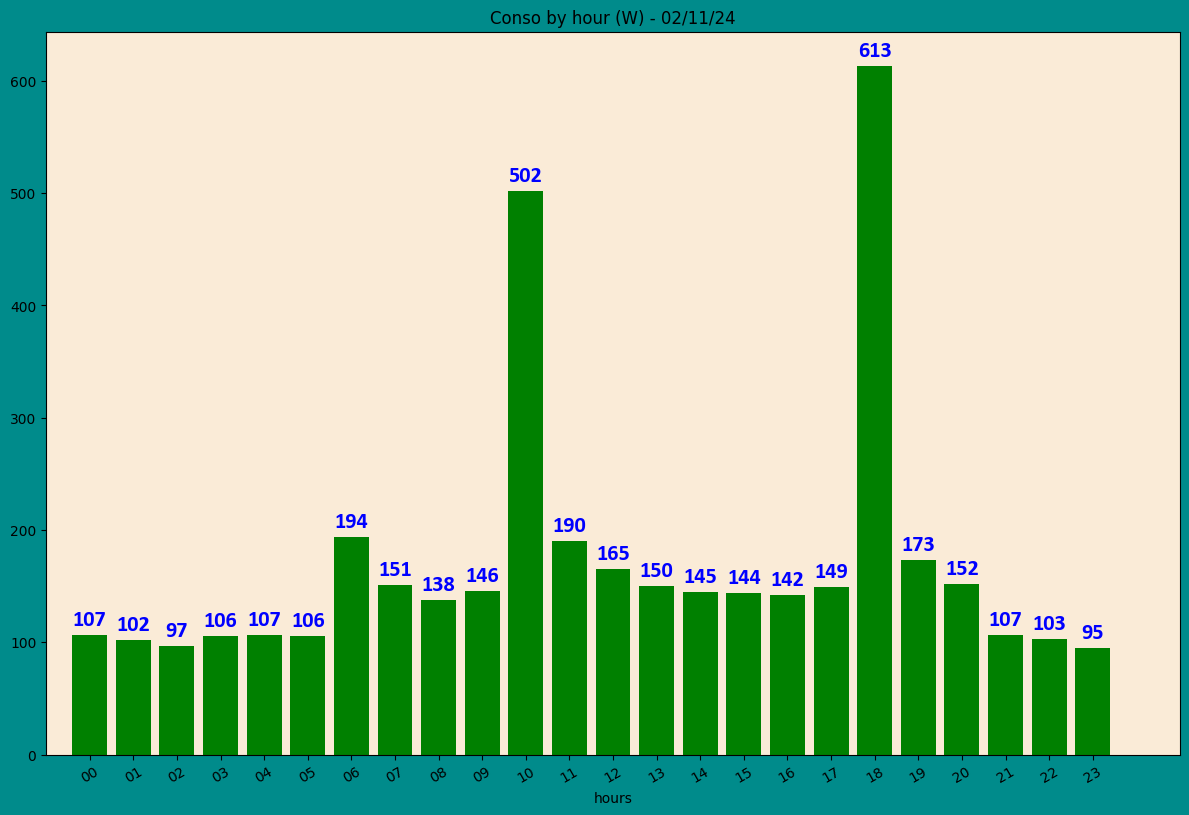

In [107]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [108]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,107,107,NaN,NaN
01,102,209,-5.0,NaN
02,97,306,-5.0,NaN
03,106,412,9.0,NaN
04,107,519,1.0,NaN
05,106,625,-1.0,NaN
06,194,819,88.0,NaN
07,151,970,-43.0,NaN
08,138,1108,-13.0,NaN


In [109]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

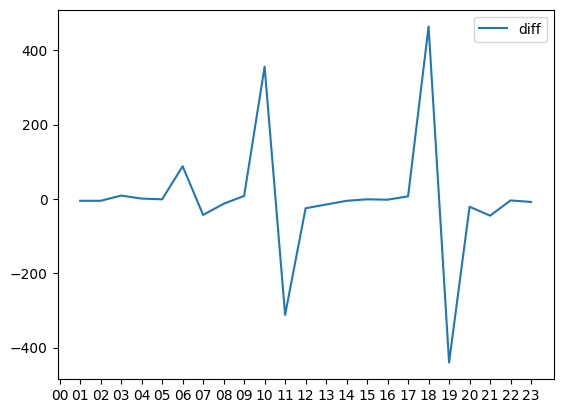

In [110]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [111]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)